In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def pad_image(image, kernel_size, padding_type="same"):
    """Pads the image based on the kernel size and padding type."""
    if padding_type == "valid":
        return image  # No padding needed
    
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    return padded_image

In [3]:
def apply_convolution(image, kernel, stride=1, padding="same", mode="convolution"):
    """
    Perform manual 2D convolution or correlation on a grayscale image.
    :param image: Input grayscale image (2D numpy array)
    :param kernel: Convolution kernel (2D numpy array)
    :param stride: Step size for sliding the kernel
    :param padding: "same" for zero-padding, "valid" for no padding
    :param mode: "convolution" or "correlation"
    :return: Output image after applying convolution or correlation
    """
    kernel_size = kernel.shape[0]
    if mode == "convolution":
        kernel = np.flipud(np.fliplr(kernel))  # Flip kernel for convolution
    
    image_padded = pad_image(image, kernel_size, padding)
    output_size = ((image_padded.shape[0] - kernel_size) // stride + 1,
                   (image_padded.shape[1] - kernel_size) // stride + 1)
    
    output = np.zeros(output_size)
    for i in range(0, output_size[0]):
        for j in range(0, output_size[1]):
            region = image_padded[i * stride: i * stride + kernel_size, j * stride: j * stride + kernel_size]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [4]:
def load_grayscale_image(image_path):
    """Loads an image in grayscale format."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

In [28]:
def visualize_results(original, kernels, kernel_names):
    """Display original and processed images side by side."""
    results = [apply_convolution(original, kernel) for kernel in kernels]
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, len(results) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    
    for idx, (result, title) in enumerate(zip(results, kernel_names)):
        plt.subplot(1, len(results) + 1, idx + 2)
        plt.imshow(result, cmap='gray')
        plt.title(title)
        plt.axis("off")
    
    plt.show()

In [29]:
image_path = "/Users/hashimmuhammadnadeem/FundofAI/cnn_scratch/grayscale_image.jpg"  
image = load_grayscale_image(image_path)

## Sobel Kernels

The Sobel operator, introduced by Irwin Sobel in 1970, computes the gradient of image intensity, emphasizing regions with high spatial frequency corresponding to edges. It uses two 3×3 convolution kernels to approximate derivatives—one for horizontal changes and one for vertical. This operator is less sensitive to noise compared to others due to its smoothing effect. 

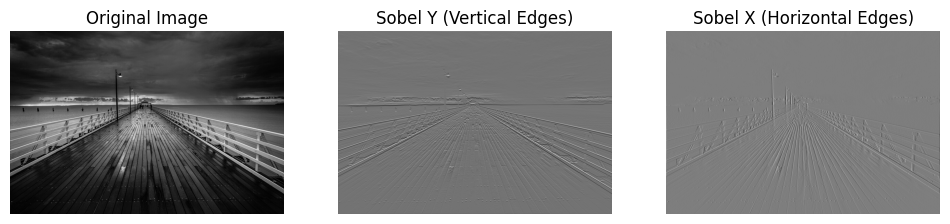

In [32]:
kernels = {
    "Sobel Y (Vertical Edges)": np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
    "Sobel X (Horizontal Edges)": np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
}

visualize_results(image, list(kernels.values()), list(kernels.keys()))

## Prewitt Kernels

The Prewitt operator is similar to the Sobel operator but uses different kernels for edge detection. It is simpler to implement computationally but tends to produce noisier results. 

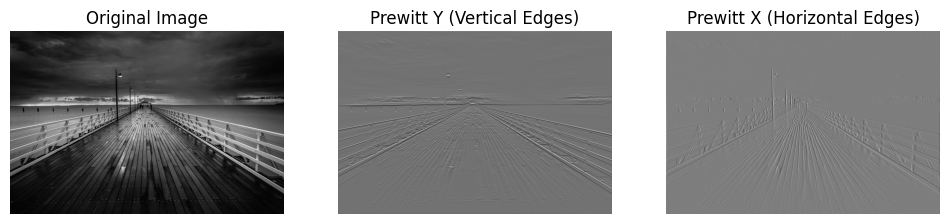

In [34]:
kernels = {
    "Prewitt Y (Vertical Edges)": np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    "Prewitt X (Horizontal Edges)": np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
}

visualize_results(image, list(kernels.values()), list(kernels.keys()))


## Laplacian Filter
The Laplacian operator is a second-order derivative operator that highlights regions of rapid intensity change, making it useful for edge detection. It is often applied to an image that has first been smoothed with a Gaussian filter to reduce its sensitivity to noise, which is why the results do not look good here

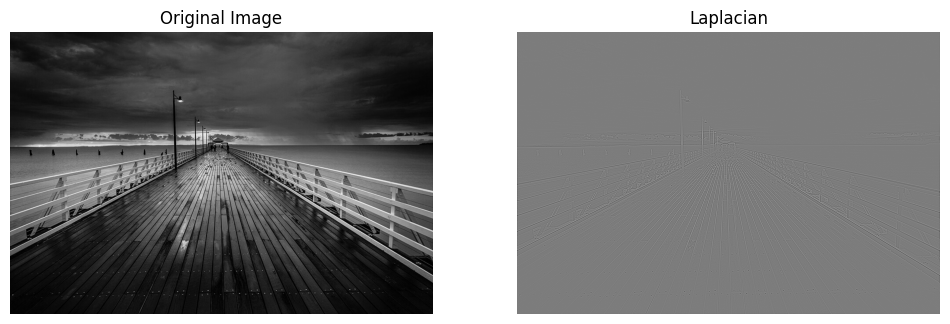

In [35]:
kernels = {
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
}

visualize_results(image, list(kernels.values()), list(kernels.keys()))


## Alternative Laplacian

An alternative Laplacian operator uses a different kernel, such as a 3×3 kernel with a central coefficient of -8 and surrounding coefficients of 1, to achieve edge detection. This variation can provide different edge detection results depending on the specific application. 

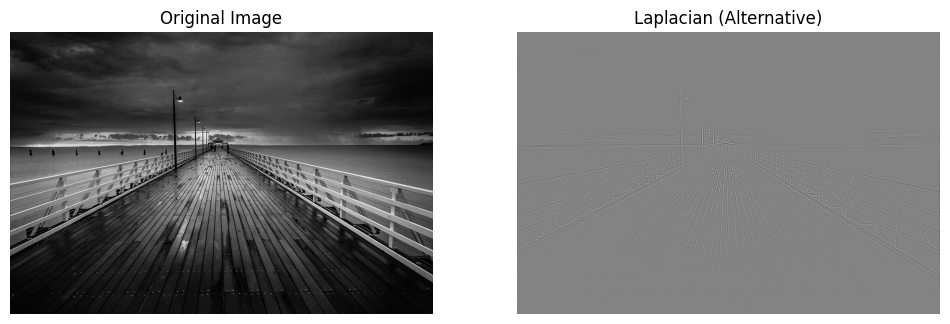

In [36]:
kernels = {
    "Laplacian (Alternative)": np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
}

visualize_results(image, list(kernels.values()), list(kernels.keys()))


## Paper to read

A detailed analysis on different edge detections and noise reduction methods can be found here: [Comparison of Different Edge Detections and Noise Reduction on Ultrasound Images](https://pmc.ncbi.nlm.nih.gov/articles/PMC4270662/)

## Mean (Box) Blur Filter
The mean (box) blur filter applies a simple averaging operation where each pixel's value is replaced by the mean of its neighbors. It is computationally efficient but can introduce blocky artifacts and does not consider pixel intensity variations. Passing the image through it once results in a mild blur, but edges remain visible.

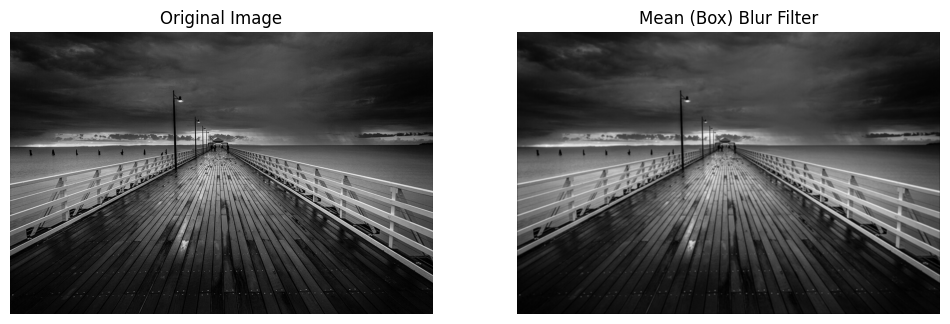

In [37]:
kernels = {
    "Mean (Box) Blur Filter": np.ones((3, 3)) / 9,
}

visualize_results(image, list(kernels.values()), list(kernels.keys()))

## Gaussian Blur
The Gaussian blur applies a weighted averaging filter where central pixels have more influence than the surrounding ones, creating a smoother, more natural blur compared to the box filter. It reduces noise effectively while preserving some structural details. A single pass results in minimal softening, requiring multiple iterations for stronger effects.

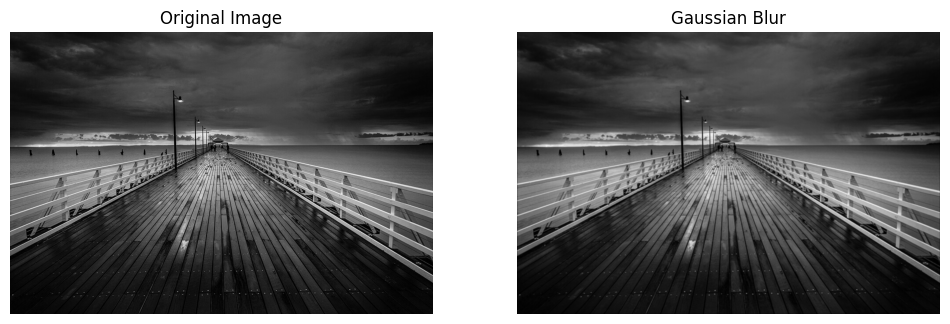

In [38]:
kernels = {
    "Gaussian Blur": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
}
visualize_results(image, list(kernels.values()), list(kernels.keys()))


## Motion Blur
The motion blur filter creates a directional blur that simulates movement across the image. It is commonly used in motion graphics or to mimic camera shake. A single application produces a subtle streaking effect, but increasing kernel size enhances the illusion of movement.

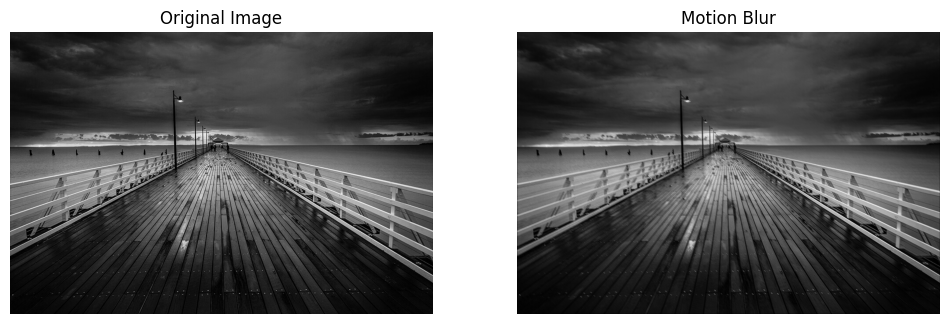

In [39]:
kernels = {
    "Motion Blur": np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) / 3
}
visualize_results(image, list(kernels.values()), list(kernels.keys()))


## Weighted Box Blur
The weighted box blur is a variation of the mean blur where the center pixel is given higher importance than its neighbors, leading to a smoother effect while retaining more image structure. A single application results in mild smoothing but does not significantly reduce sharp edges.

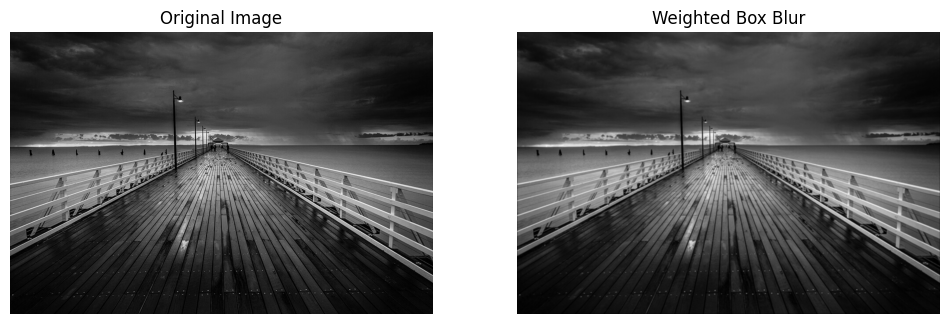

In [40]:
kernels = {
    "Weighted Box Blur": np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]]) / 10
}
visualize_results(image, list(kernels.values()), list(kernels.keys()))


## One Pass is Not Enough.
Since these filters primarily operate on local pixel neighborhoods, a single pass results in a minor effect—edges and high-frequency details still remain visible. Multiple passes or larger kernel sizes are needed for more pronounced blurring

## Standard Sharpen
This classic sharpening technique uses a kernel that accentuates differences between a pixel and its neighbors, enhancing edges with minimal noise. It’s effective for general-purpose sharpening in images with moderate detail.

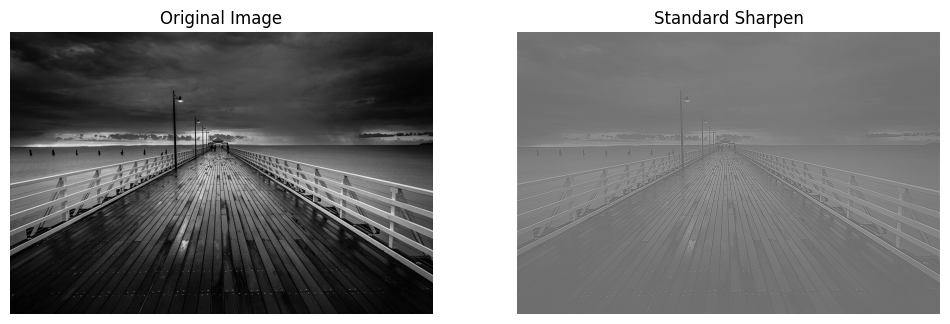

In [41]:
kernels = {
    "Standard Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
}
visualize_results(image, list(kernels.values()), list(kernels.keys()))


## High-Boost Sharpen
High-Boost sharpening employs a more aggressive kernel that amplifies the center pixel significantly, bringing out fine details. However, this strong enhancement can also increase noise, so it's best for high-quality images.

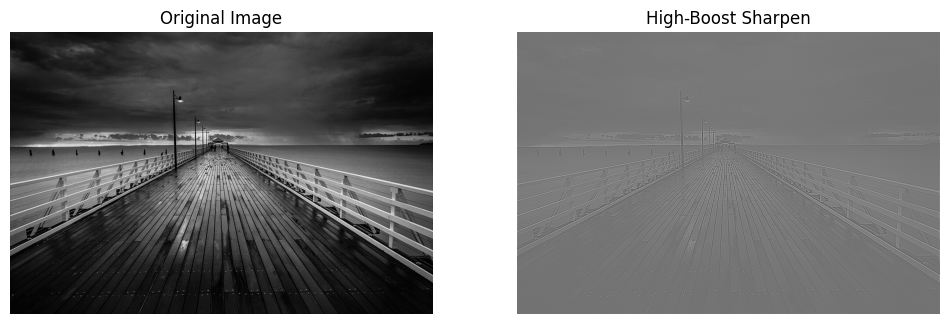

In [42]:
kernels = {
    "High-Boost Sharpen": np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
}
visualize_results(image, list(kernels.values()), list(kernels.keys()))


## Edge-Enhancing Sharpen
The Edge-Enhancing Sharpen filter focuses on accentuating edges by applying a kernel that emphasizes boundary transitions while preserving surrounding detail. It strikes a balance between increasing edge contrast and controlling noise amplification.

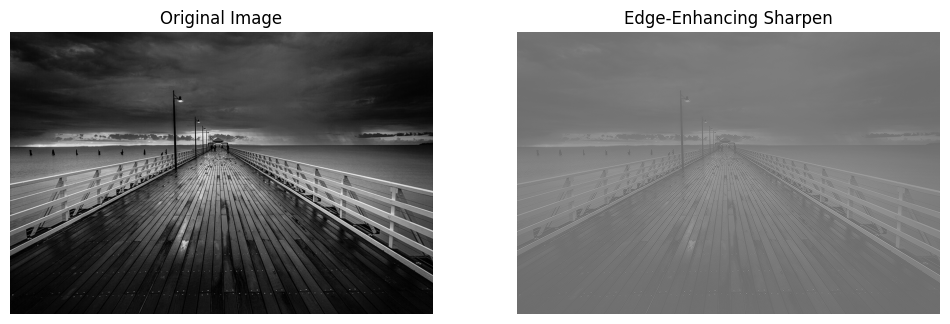

In [43]:
kernels = {
    "Edge-Enhancing Sharpen": np.array([[1, -2, 1], [-2, 5, -2], [1, -2, 1]])
}
visualize_results(image, list(kernels.values()), list(kernels.keys()))


## More passes = better results? 
Pass count requires careful consideration, not automatic increase. We'll explore this with Gaussian blur.

​Applying multiple passes of a Gaussian blur to an image incrementally smooths it, effectively reducing noise and fine details. This technique is commonly used in image processing to achieve a desired level of blurriness. 

However, it's important to note that applying several successive Gaussian blurs is mathematically equivalent to applying a single Gaussian blur with a larger standard deviation. Specifically, the resulting blur radius is the square root of the sum of the squares of the individual blur radii applied. 

For example, applying Gaussian blurs with radii of 6 and 8 sequentially yields the same effect as a single blur with a radius of 10, since √(6² + 8²) = 10. Therefore, while multiple passes can achieve stronger blurring, it's often more efficient to apply a single Gaussian blur with the desired standard deviation to minimize computational load.

In [ ]:
def apply_multiple_passes(image, kernel, num_passes=3):
    """Applies the convolution multiple times while keeping the image size using same padding."""
    output = image.copy()
    for _ in range(num_passes):
        output = apply_convolution(output, kernel, padding="same")  
    return output

In [49]:
def visualize_results_num_passes(original, processed_images, titles):
    """Display original and processed images without redundant convolution."""
    plt.figure(figsize=(12, 6))

    plt.subplot(1, len(processed_images) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    for idx, (result, title) in enumerate(zip(processed_images, titles)):
        plt.subplot(1, len(processed_images) + 1, idx + 2)
        plt.imshow(result, cmap='gray')
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

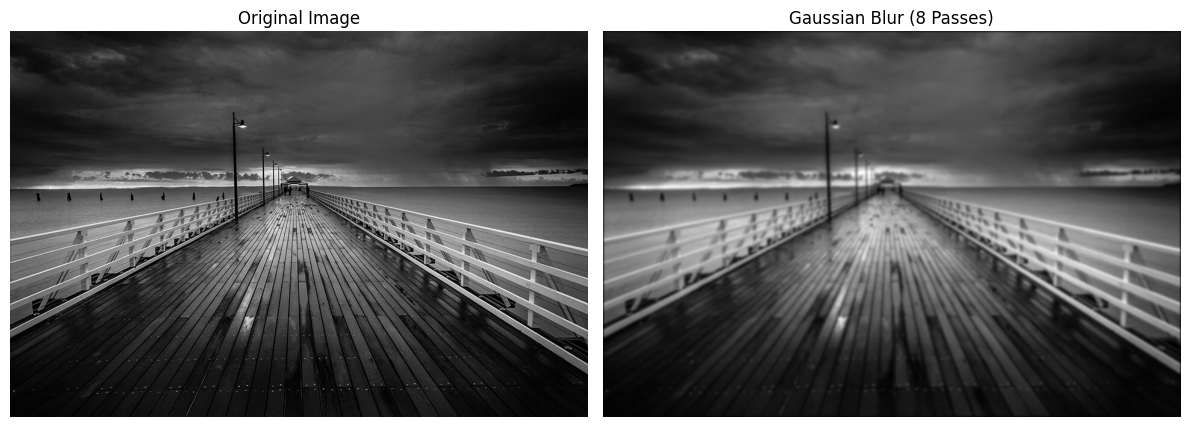

In [54]:
num_passes = 8

gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

blurred_image = apply_multiple_passes(image, gaussian_kernel, num_passes)

visualize_results_num_passes(image, [blurred_image], [f"Gaussian Blur ({num_passes} Passes)"])


## Alternative reality 
In the case of blur, adding extra passes made the ouput better, but when we use an edge sharpening kernel and make it have multiple passes, the output is corrupted.

This degradation occurs because each pass amplifies not only the desired edge information but also any existing noise, leading to an unnatural and visually unappealing image.

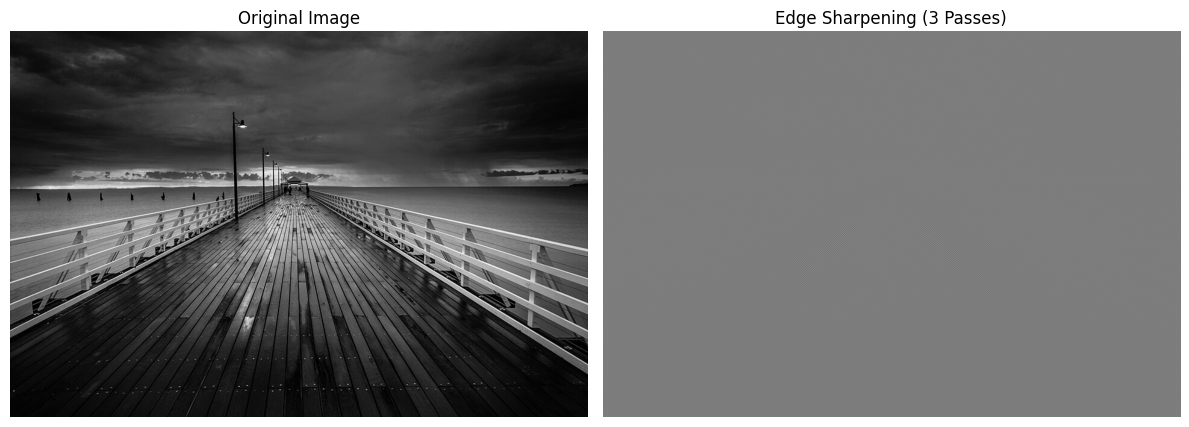

In [58]:
num_passes = 3

edge_kernel = np.array([[1, -2, 1], [-2, 5, -2], [1, -2, 1]])

blurred_image = apply_multiple_passes(image, edge_kernel, num_passes)

visualize_results_num_passes(image, [blurred_image], [f"Edge Sharpening ({num_passes} Passes)"])
